# Allocate Benchmarks

In [2]:
# select measurement file
file_name = "../output/2024-08-25 19-34-06 full.json"

# select style options
grey_fill_between = False

enable_storage_reference = True

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [3]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [4]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
deallocate_min = convert_data(raw_data, "deallocate_min", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_max = convert_data(raw_data, "deallocate_max", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_case1 = convert_data(raw_data, "deallocate_case_1", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(deallocate_min.head())
display(HTML("<b>MAX Data:</b>"))
display(deallocate_max.head())
display(HTML("<b>Case 1 Data:</b>"))
display(deallocate_case1.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,19035.0,19035,19035,0,esp32c3,100,1000,16000
1,19034.0,19034,19034,32,esp32c3,100,1000,16000
2,19033.0,19033,19033,64,esp32c3,100,1000,16000
3,19034.0,19034,19034,96,esp32c3,100,1000,16000
4,19034.0,19034,19034,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,960193.0,960193,960193,0,esp32c3,100,1000,16000
1,832193.0,832193,832193,32,esp32c3,100,1000,16000
2,799985.0,799985,799985,64,esp32c3,100,1000,16000
3,808458.0,808458,808458,96,esp32c3,100,1000,16000
4,835033.0,835033,835033,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,213638.000,213638,213638,0,esp32c3,100,1000,16000
1,101639.000,101639,101639,32,esp32c3,100,1000,16000
2,67034.000,67034,67034,64,esp32c3,100,1000,16000
3,88459.000,88459,88459,96,esp32c3,100,1000,16000
4,115034.998,115033,115035,128,esp32c3,100,1000,16000


In [5]:

from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, deallocate_max["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,2636.0,2636,2636,0,esp32c3,100,1000,16000
1,23509.0,23509,23509,32,esp32c3,100,1000,16000
2,48339.0,48339,48339,64,esp32c3,100,1000,16000
3,69211.0,69211,69211,96,esp32c3,100,1000,16000
4,96340.0,96340,96340,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,3908.0,3908,3908,0,esp32c3,100,1000,16000
1,31994.0,31994,31994,32,esp32c3,100,1000,16000
2,48177.0,48177,48177,64,esp32c3,100,1000,16000
3,68964.0,68964,68964,96,esp32c3,100,1000,16000
4,96177.0,96177,96177,128,esp32c3,100,1000,16000


# Final Plot

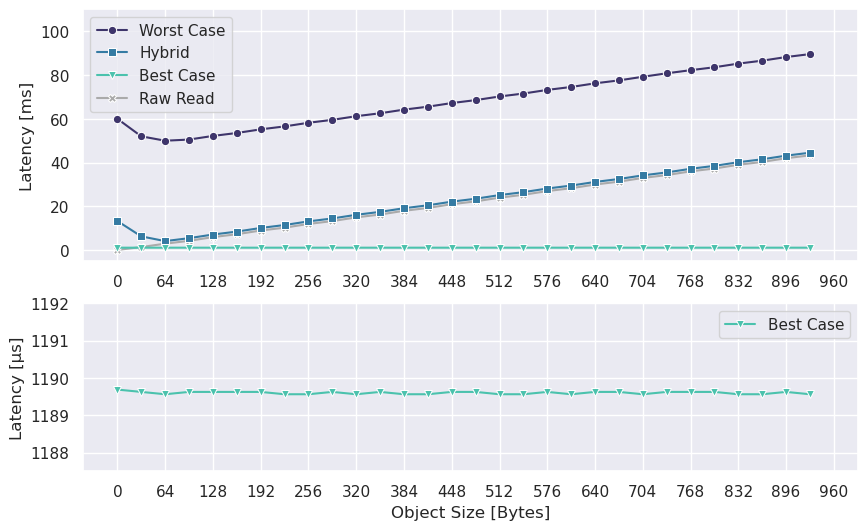

In [7]:
from util.plot import set_gird, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()

fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(10)

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1.5, 1])

ax = plt.subplot(gs[0])

unit = "ms"

if enable_storage_reference and len(storage_read) != 0:
    storage_read_scaled = scale_data(storage_read, unit)
    sns.lineplot(ax=ax, x=storage_read_scaled["options.object_size"], y=storage_read_scaled["mean"], label="Raw Read", markers=["o"], marker="X", color="#aaaaaa")

if len(deallocate_max) != 0:
    deallocate_max_scaled = scale_data(deallocate_max, unit)
    sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)

if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Hybrid", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel(None)
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=-5, top=110)


if enable_storage_reference:
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(handles.pop(0))
    labels.append(labels.pop(0))
    plt.legend(handles, labels) 

set_theme(3, 2)

ax = plt.subplot(gs[1])

# unit = "ms"
unit = "µs"

# if len(deallocate_max) != 0:
#     deallocate_max_scaled = scale_data(deallocate_max, unit)
#     sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
#     ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)


# if len(deallocate_case1) != 0:
#     deallocate_case1_scaled = scale_data(deallocate_case1, unit)
#     sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
#     ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=1.1875 * 1000, top=1.192 * 1000)


save_plot("deallocate")